In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

saved_model = tf.keras.models.load_model('saved_models/cnn.keras')

# Show the model architecture
saved_model.summary()

test_datagen = ImageDataGenerator(
    rescale=1./255
)

test_generator = test_datagen.flow_from_directory(
    'test_dataset/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Evaluate the restored model
loss, acc = saved_model.evaluate(test_generator, steps=None)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 52, 52, 64)        36928     
_________________________________________________________________
dropout_1 (Dropout)          (None, 52, 52, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 173056)           

In [2]:
import os
import numpy as np
from PIL import Image

# Load the image and resize it to the desired dimensions
image_folder = '1K_1-4W'
image_name = '1K_1-4W_(5).jpg'
image_path = f'test_dataset/{image_folder}/{image_name}'
image = Image.open(image_path)
image = image.resize((224, 224))

# Convert the image to a NumPy array and normalize the pixel values (if necessary)
image_array = np.asarray(image)
image_array = image_array / 255.0  # Normalize the pixel values between 0 and 1

# Reshape the image array to match the input shape of your model
image_array = image_array.reshape(1, 224, 224, 3)  # Assumes the input shape is (width, height, 3)

classes = np.array([name for name in os.listdir('test_dataset')])
pred = saved_model.predict(image_array)
prediction = classes[np.argmax(pred, axis = -1)]
actual = image_folder
print('predicted: ', prediction[0])
print('actual: ', actual)

predicted:  1K_2W
actual:  1K_1-4W


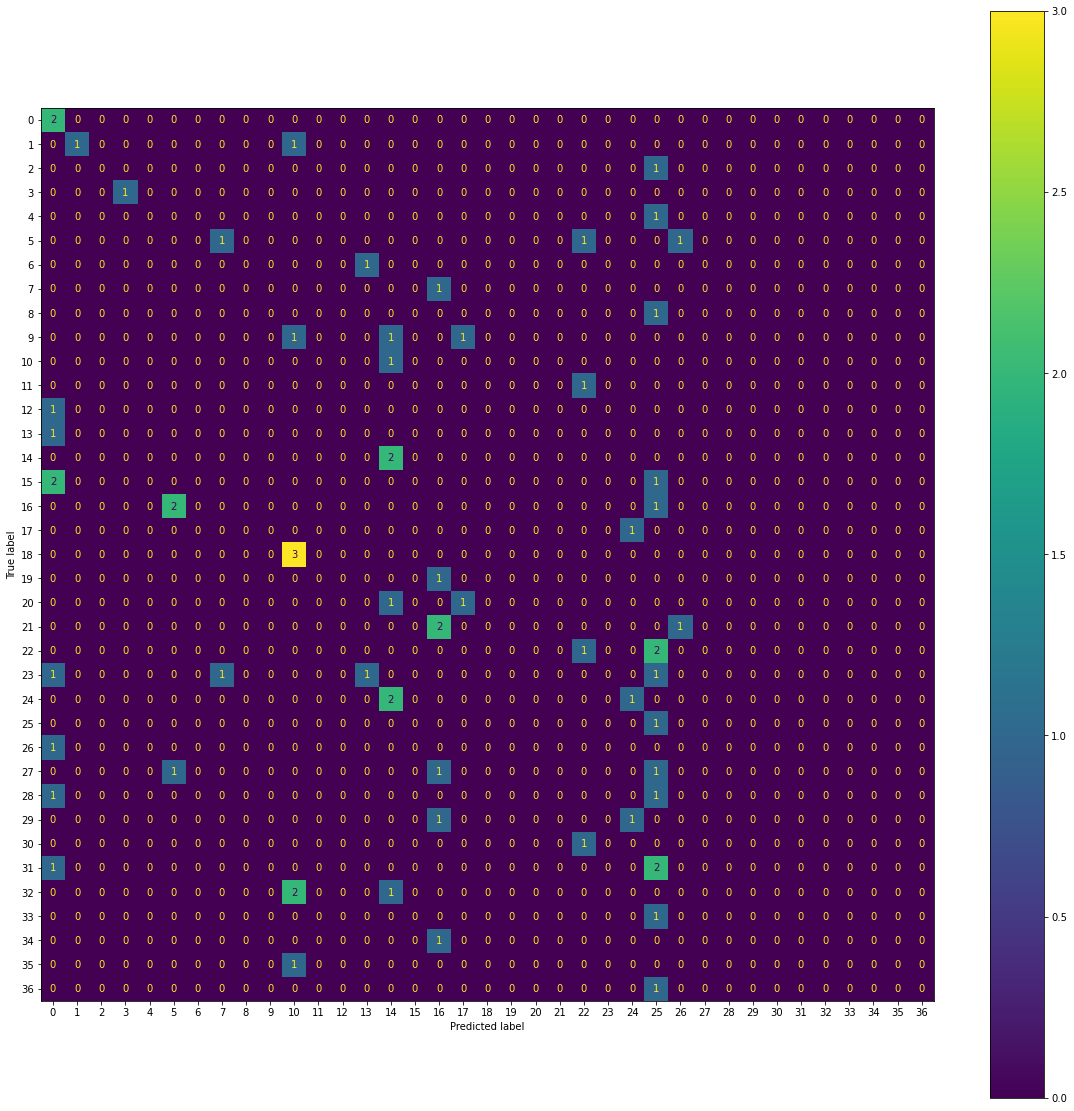

In [3]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion Matrix
labels = []
predictions = []
classes = [name for name in os.listdir('test_dataset')]
for image_folder in os.listdir('test_dataset'):
    for image_name in os.listdir('test_dataset/' + image_folder):
        image_path = f'test_dataset/{image_folder}/{image_name}'
        image = Image.open(image_path)
        image = image.resize((224, 224))

        # Convert the image to a NumPy array and normalize the pixel values (if necessary)
        image_array = np.asarray(image)
        image_array = image_array / 255.0  # Normalize the pixel values between 0 and 1

        # Reshape the image array to match the input shape of your model
        image_array = image_array.reshape(1, 224, 224, 3)  # Assumes the input shape is (width, height, 3)

        pred = saved_model.predict(image_array)
        prediction = np.argmax(pred, axis = -1)
        actual = image_folder
        labels.append(classes.index(actual))
        predictions.append(prediction[0])

cm = confusion_matrix(labels, predictions).ravel()
disp = ConfusionMatrixDisplay(confusion_matrix=cm.reshape(37,37))
fig, ax = plt.subplots(figsize=(20,20))
disp.plot(ax=ax)